# Presentation n°2: Multi-Layer Perceptrons (MLP) 
 Presented by: Mohamed Oussema BEN SLIMA - Ons BOUSBIH

In this notebook we will try to explore the MLP algorithm and apply it to the pyrat game in order to build  model that predicts the winner of the game based on the initial maze configuration.

In [ ]:
#IMPORTS

## I- Multi-Layer Perceptrons:

Multilayer Perceptrons (MLP) are a class of feedforward artificial neural networks composed of multiple fully connected (FC) layers of nodes.

The network is composed of:

- <font color='green'>An input layer:</font> Receives input features.
- <font color='green'>Hidden layers:</font> Intermediate layers that transform input data into a form that the output layer can use ( these are the computational core of the algorithm)
- <font color='green'>Output layer:</font> Produces the final output.
- <font color='green'>Activation Function:</font> Typically, nonlinear activation functions like ReLU (Rectified Linear Unit) are used in hidden layers, while the output layer may use different activation functions based on the task (e.g., softmax for classification, linear for regression).

<div style="display:flex;">
  <img src='https://miro.medium.com/v2/resize:fit:563/1*4_BDTvgB6WoYVXyxO8lDGA.png' alt="Architecture of MLP" style="width:50%;">
  <img src='https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png' style="width:50%;">
</div>



There are 3 steps that are repeated iteratively to train the model:  

<font color='green'>1- Feedforward Mechanism:</font>  

- Each layer feeds its computation results to the next layer.  
- Information flows through hidden layers to the output layer.  

<font color='green'>2- Error estimation:</font>
- Predictions (outputs) are compared to the actual targets (ground-truth data).  
- The error or loss is calculated using a predefined loss function, such as mean squared error (MSE) for regression tasks or cross-entropy loss for classification tasks.

<font color='green'>3- Backpropagation:</font>
- It is the learning mechanism for MLP, adjusts weights iteratively in order to minimize the loss function.  
- The error is propagated backward through the network.  
- The partial derivatives of the loss function with respect to each weight and bias in the network are computed.  
- Gradient Descent is used for optimization.  


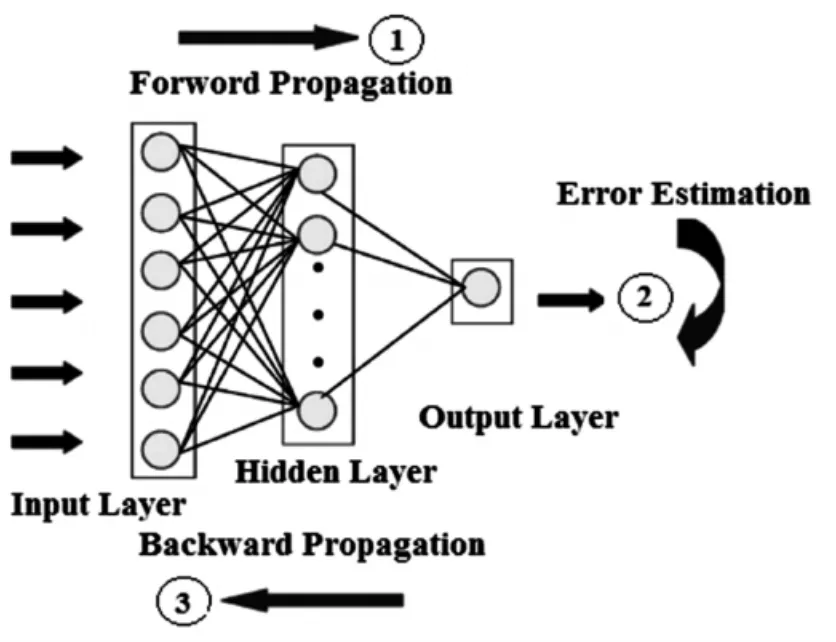


## II- MLP for classifying randomly generated data:

In [7]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=3000, centers=3, n_features=2,random_state=0)

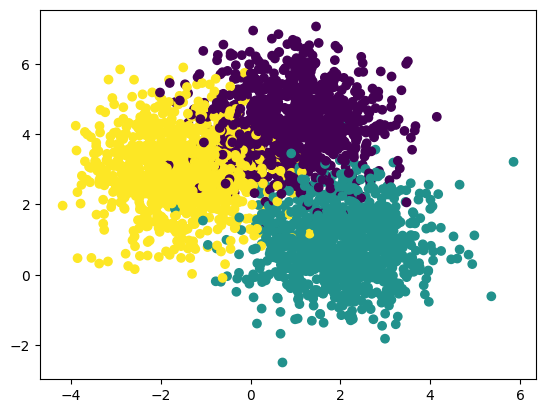

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=0)

In [10]:

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred.shape)
classifier.score(x_test,y_test)

(600,)


0.9066666666666666

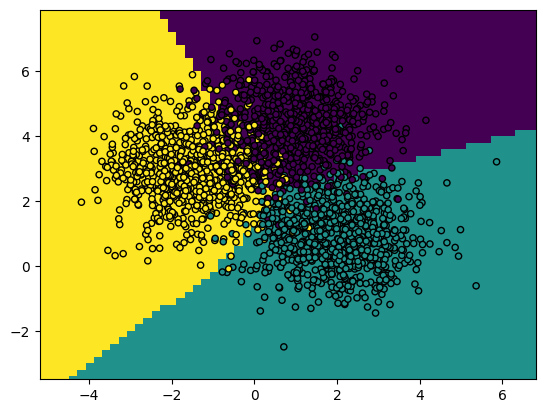

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

## III- MLP on Pyrat: